# Hierarchical Clustering

**CS5483 Data Warehousing and Data Mining**
___

In [1]:
%reset -f
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.cluster import AgglomerativeClustering
# produce vector inline graphics
from IPython.display import set_matplotlib_formats, Code
set_matplotlib_formats('svg')
from ipywidgets import interact
import ipywidgets as widgets
from util import plot_dendrogram
from scipy.optimize import linear_sum_assignment

In this notebook, we will continue to cluster the instances in the iris dataset. We will try to use the hierarchical clustering algorithm to identify the different iris species without looking at the class attribute.

## Clustering using Weka

Similar to the last tutorial, use the `Cluster` panel to cluster the `iris.2D` dataset:

1. Using the `Preprocess` panel, load `iris.2D.arff` from the Weka data folder.
1. Using the `Cluster` panel, choose the `Clusterer` as `HierarchicalClusterer`, which implements the agglomerative nesting (AGNES) for different cluster distance measures.
1. The default number of clusters is \(k=2\). Change it to \(k=3\) instead, i.e., set `numClusters` to 3.
1. Select `Classes to clusters evaluation` as the `cluster mode`. Unlike other cluster modes, the class attribute is ignored automatically so there is NO need to click `ignore attributes` button below the `Cluster mode` to ignore `class`.
1. Click `Start` to run the clustering algorithm.

Alternatively, you may also use the [python-weka-wrapper](https://github.com/fracpete/python-weka-wrapper-examples/tree/master/src/wekaexamples/clusterers) to obtain the answer.

### Single-linkage

The default `linkType` is `SINGLE`, which measures the distance between two clusters, say $C$ and $C'$, by

\begin{align}
\min_{\boldsymbol{p}\in C, \boldsymbol{p'}\in C'} \operatorname{dist}(\boldsymbol{p}, \boldsymbol{p'}),
\end{align}

which is the minimum distance between points in different clusters. This gives the [single-linkage clustering solution](https://en.wikipedia.org/wiki/Single-linkage_clustering).

**Exercise**  Assign to `error_rate` the fraction (NOT percentage) of incorrectly clustered instances.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()
error_rate

In [ ]:
# tests

**Exercise** Right click your result and click `visualize cluster assignments`. (If the item is disabled, check the `Store clusters for visualization` option and rerun the clustering.) From the visualization of the errors, explain why the performance is better/worse than that of the $k$-means algorithm.

The distance between the closest points of Iris-versicolor and Iris-virginica is too small for the single-linkage algorithm to distinguish the two classes. The dendrogram suggests there are two clearly separated clusters only.

### Complete-linkage

Repeat the hierarchical clustering procedure but with the complete linkage algorithm by setting the `linkType` to COMPLETE. The distance between two clusters is measured by

\begin{align}
\max_{\boldsymbol{p}\in C, \boldsymbol{p'}\in C'} \operatorname{dist}(\boldsymbol{p}, \boldsymbol{p'}),
\end{align}

which is the maximum distance between points in different clusters. This gives the [complete-linkage clustering solution](https://en.wikipedia.org/wiki/Complete_linkage).

**Exercise** Assign to `error_rate` the fraction (NOT percentage) of incorrectly clustered instances. 

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()
error_rate

In [ ]:
# tests

**Exercise** Visualize the clustering assignments again and explain whether the clustering solution better than the single-linkage solution.

YOUR ANSWER HERE

### Dendrogram

To visualize the dendrogram, right click your last clustering result and select `Visualize tree`. (If the item is disabled, check the `Store clusters for visualization` option and rerun the clustering.) The following is dendrogram for complete linkage.

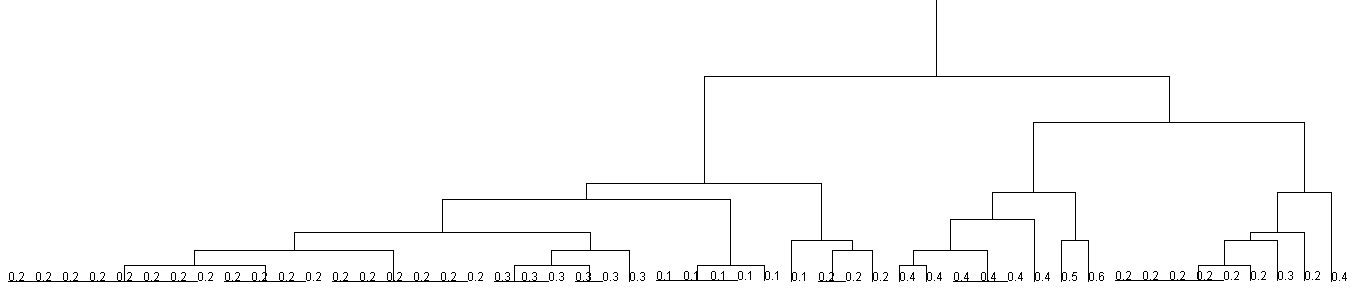

There are two issues with the dendrogram:

1. The dendrogram is incomplete and contains nodes for the first cluster only. The agglomerative clustering stopped immediately after having `numClusters = 3` clusters.
2. The leaf nodes have names that are fractions. By default, the leaf names are taken from the last attribute other than the ignored class attribute. In this case, the name such as 0.2 is a `petalwidth`, which is not useful in identifying the samples or evaluating the clustering solution.

To fix the above issues:

1. Set `numClusters` to 1 so that the agglomerative clustering continues to merge all nodes into a single clusters.
1. In the preprocess panel, create a new attribute `ID` as the last attribute to name the leaf node uniquely. You can copy the following configuration into the `Filter` panel:
```
weka.filters.MultiFilter -F "weka.filters.unsupervised.attribute.AddID -C last -N ID" -F "weka.filters.unsupervised.attribute.NumericToNominal -R last" -F "weka.filters.unsupervised.attribute.NominalToString -C last"
```

The above uses `MultiFilter` to compose three filters sequentially into one meta-filter.
1. `AddID` create a unique numeric ID for each sample.
1. `NumericToNominal` followed by `NominalToString` converts the ID to a string. The clustering algorithm use it for leaf name but not in the calculation of cluster distances. 

After applying the filter and re-running the clustering algorithm with `numClusters = 1` and `class` attribute ignored, the resulting dendrogram is as follows:

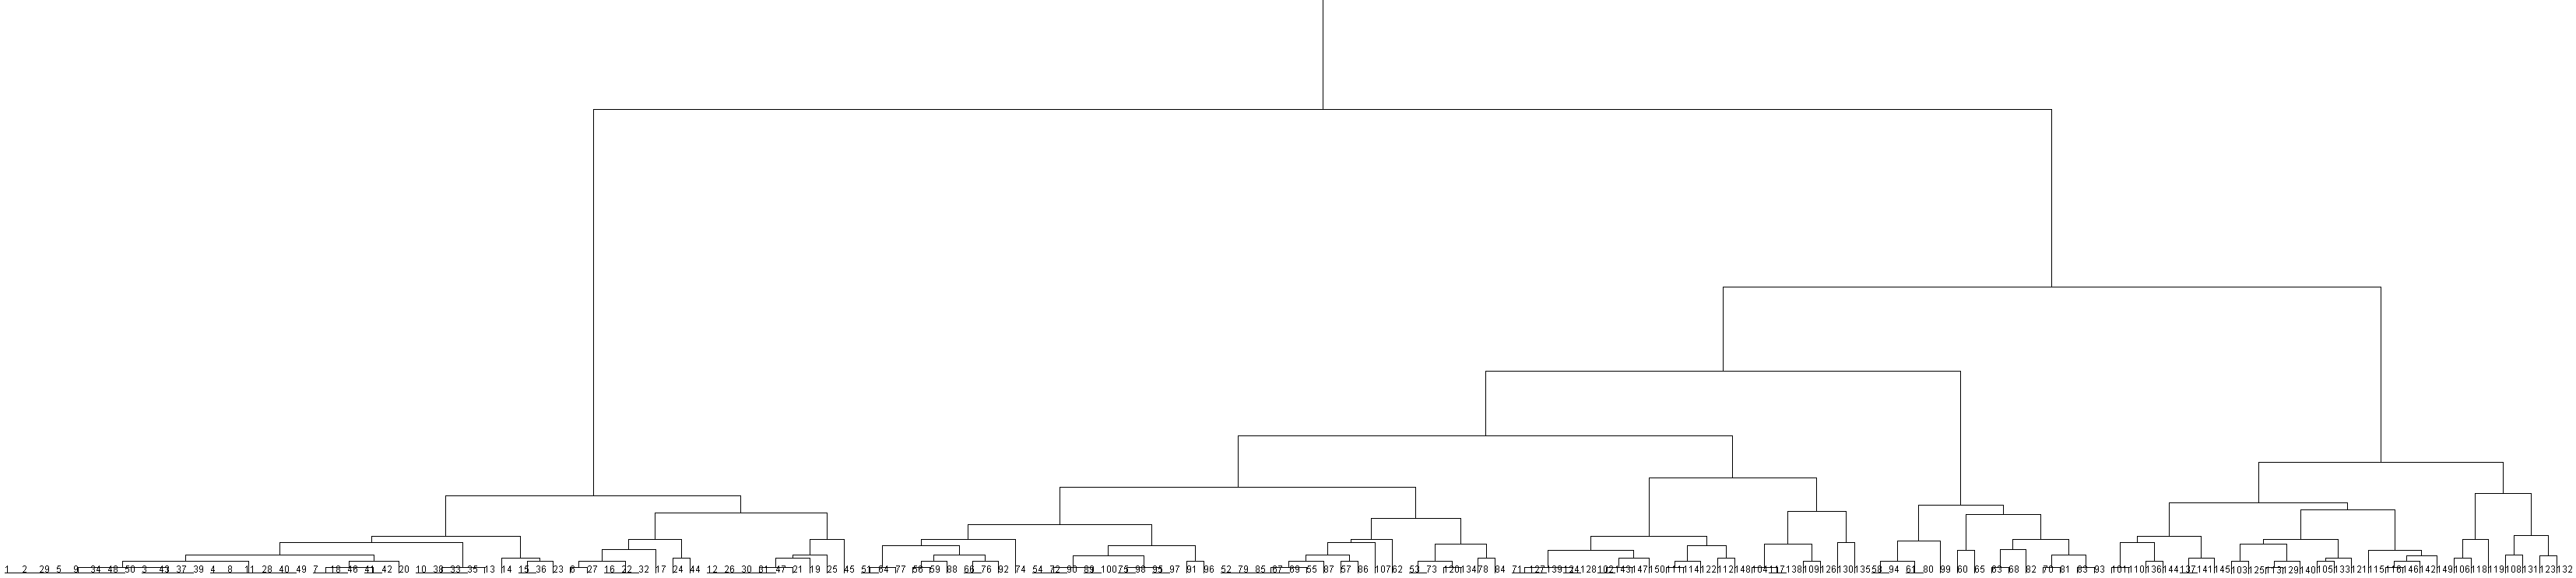

**Exercise** Put the complete dendrogram for single-linkage method in the following cell. Each leaf name should be a unique ID.

YOUR ANSWER HERE

**Exercise** By comparing the dendrogram with single linkage vs that with complete linkage, explain why complete linkage gives a better solution for the iris dataset.

*Hint: Consider the range of cophenetic distance that gives 3 clusters instead of 2.*

YOUR ANSWER HERE

### Dendrogram in text format

The dendrogram is quite hard to read especially when the data set is large. By default, the dendrogram is printed as text in the result buffer:
```
Cluster 0
(((((((((((1:0,2:0):0,29:0):0,(5:0,9:0):0):0,((34:0,48:0):0,50:0):0):0.01695,((3:0,43:0):0,(37:0,39:0):0):0.01695):0.01695,((4:0,(8:0,11:0):0):0,(28:0,(40:0,49:0):0):0):0.0339):0.01982,(((7:0,(18:0,46:0):0):0.01695,(41:0,42:0):0.01695):0.01695,20:0.0339):0.01982):0.03625,(((10:0,38:0):0,(33:0,35:0):0):0.01695,13:0.01695):0.07301):0.01746,(14:0.04498,((15:0,36:0):0.0339,23:0.0339):0.01108):0.06245):0.11748,(((((6:0.01695,27:0.01695):0.01695,((16:0,22:0):0,32:0):0.0339):0.0339,17:0.0678):0.02982,(24:0.04498,44:0.04498):0.05264):0.07663,((((((((12:0,26:0):0,30:0):0,31:0):0,47:0):0.01695,21:0.01695):0.02803,19:0.04498):0.00873,25:0.05371):0.04391,45:0.09762):0.07663):0.05066):1.11921,(((((((((51:0,64:0):0.01695,77:0.01695):0.06263,(((56:0.01695,59:0.01695):0.01695,88:0.0339):0.01982,((66:0,76:0):0.0339,92:0.0339):0.01982):0.02586):0.01804,74:0.09762):0.04423,(((((54:0,72:0):0,90:0):0.01695,(89:0,100:0):0.01695):0.0339,((75:0,98:0):0.01695,(95:0,97:0):0.01695):0.0339):0.02873,(91:0.0339,96:0.0339):0.04568):0.06227):0.10672,(((((((((52:0,(79:0,85:0):0):0,67:0):0,69:0):0.01695,55:0.01695):0.01695,87:0.0339):0.01982,(57:0.0339,86:0.0339):0.01982):0.03625,107:0.08996):0.00766,62:0.09762):0.06153,(((53:0,73:0):0.0339,(120:0.01695,134:0.01695):0.01695):0.05114,(78:0.04498,84:0.04498):0.04006):0.07411):0.08942):0.14931,(((((71:0,(127:0,139:0):0):0.01695,(124:0,128:0):0.01695):0.04879,(((102:0,143:0):0.01695,147:0.01695):0.02803,150:0.04498):0.02076):0.04169,(((111:0.01695,114:0.01695):0.01695,122:0.0339):0.04568,(112:0.04498,148:0.04498):0.03459):0.02785):0.1693,(((104:0.01695,(117:0,138:0):0.01695):0.0678,(109:0.0339,126:0.0339):0.05085):0.09518,(130:0.08996,135:0.08996):0.08996):0.0968):0.12116):0.1883,((((58:0,94:0):0.0339,(61:0,80:0):0.0339):0.06054,99:0.09443):0.10278,((60:0.06574,65:0.06574):0.10434,(((63:0.01695,68:0.01695):0.05085,82:0.0678):0.02982,((70:0.01695,81:0.01695):0.03676,(83:0.01695,93:0.01695):0.03676):0.04391):0.07246):0.02714):0.38897):0.24263,(((((101:0.01695,110:0.01695):0.07301,(136:0.0339,144:0.0339):0.05607):0.01746,((137:0,141:0):0.04498,145:0.04498):0.06245):0.09715,((((103:0.0339,125:0.0339):0.05085,((113:0.01695,129:0.01695):0.01695,140:0.0339):0.05085):0.01288,((105:0.0339,133:0.0339):0.01108,121:0.04498):0.05264):0.0868,(115:0.06574,(((116:0.01695,146:0.01695):0.01695,142:0.0339):0.01695,149:0.05085):0.01489):0.11868):0.02016):0.1177,(((106:0.04498,118:0.04498):0.05264,119:0.09762):0.13421,((108:0.05371,131:0.05371):0.05619,(123:0.05085,132:0.05085):0.05905):0.12193):0.09046):0.50654):0.5153)
```
which is in [Newick format](nwf) with distances and leaf names. E.g., `(1:0,2:0)` means node `1` and `2` are merged to an internal node at cophenetic distance `0`.

[nwf]: https://en.wikipedia.org/wiki/Newick_format#Examples

**Exercise** From the following dendrogram in Newick format, assign to `cluster0` and `cluster1` the two clusters merged last, and assign to `cluster_distance` the distance of the two clusters.  
```
((((((1:0,2:0):0,29:0):0,(5:0,9:0):0):0,((34:0,48:0):0,50:0):0):0.01695,((3:0,43:0):0,(37:0,39:0):0):0.01695):0.01695)
```
Your answer may look like
```Python
cluster0 = {1, 2, ...}
cluster1 = {...}
cluster_distance = ___
```

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()
cluster0, cluster1, cluster_distance

In [ ]:
# tests

## Clustering using scikit-learn

We first import the iris dataset from `sklearn.datasets` and store it as a DataFrame.

In [ ]:
# load the dataset from sklearn
dataset = datasets.load_iris()

# create a DataFrame to help further analysis
df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target
df.target = df.target.astype('category')
df.target.cat.categories = dataset.target_names
df  # display an overview of the data

To normalize the features followed by [agglomerative clustering](AgglomerativeClustering), we create a pipeline as follows:

[AgglomerativeClustering]: (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

agnes_minmax_normalized = make_pipeline(
    preprocessing.MinMaxScaler(),
    AgglomerativeClustering(n_clusters=3,
                            linkage='complete',
                            memory='private',
                            compute_distances=True))
agnes_minmax_normalized

In the above, we configured the agglomerative clustering algorithm to use complete-linkage to return 3 clusters. Furthermore:
- By setting the parameter `memory`, the solution will be cached to the specified folder `private`.
- By setting compute_distances to `True`, the cluster distances are computer for dendrogram visualization later on.

To cluster based on the two input features `petal length (cm)` and `petal width (cm)`:

In [ ]:
feature1, feature2 = 'petal length (cm)', 'petal width (cm)'
cluster_labels = agnes_minmax_normalized.fit_predict(df[[feature1, feature2]])

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(df[feature1], df[feature2], c=cluster_labels)
plt.title("Cluster assignment")
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.subplot(122)
plt.scatter(df[feature1], df[feature2], c=dataset['target'])
plt.title("Class (ground truth)")
plt.xlabel(feature1)
plt.show()

The [`fit_predict`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering.fit_predict) method fits and returns the cluster labels for the given data.

**Exercise** `AgglomerateClustering` does not implement [a separate `predict` method, unlike `KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.predict). Why?

The `predict` method of `KMeans` take samples that are possibly not used for training and returns the closest cluster the samples belong to by comparing . This is not possible for `AgglomerativeClustering` as it can only cluster samples used for training.

### Dendrogram

Further details of a clustering solution can be obtained from the fitted properties (those with a [trailing underscore](https://github.com/rasbt/python-machine-learning-book/blob/master/faq/underscore-convention.md)):

In [ ]:
agnes = agnes_minmax_normalized['agglomerativeclustering']
print('Cluster labels for each sample:', *agnes.labels_)
print('Children of each non-leaf node:', *agnes.children_)
print('Distances between nodes:', *agnes.distances_.round(3))
print('Number of leaves:', agnes.n_leaves_)
print('Number of connected components:', agnes.n_connected_components_)

To plot the dendrogram, we will use the function `plot_dendrogram` below:

In [2]:
Code('util.py')

import numpy as np
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

def plot_dendrogram(model, ax=None, **kwargs):
    '''Plot the dendrogram a clusterer on a 2D dataset.
    
    Parameters
    ----------
    model (sklearn): An AgglomerativeClustering object with cluster distances computed,
      e.g., by setting the parameter compute_distances=True and applying fit method to samples.
    ax (axis): axis to plot the dendrogram.
    **kwargs: additional parameters to be passed to scipy.cluster.hierarchy.dendrogram
    
    Return
    ------
    axis: axis for the plot of the decision boundaries
    
    See also
    --------
    scipy.cluster.hierarchy.dendrogram
    
    Reference
    ---------
    https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html
    '''
    if ax is None:
        ax = plt.gca()
        
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, ax=ax, **kwargs)
    return ax

The code is adopted from [an example in `sklearn`](https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html), which uses [`dendrogram` from `scipy.cluster.hierarchy`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html). To generate the dendrogram:

In [ ]:
from util import plot_dendrogram

plt.figure(figsize=(10, 5))
plot_dendrogram(agnes, leaf_font_size=4, distance_sort=True)
plt.title('Dendrogram for complete-linkage method on iris dataset')
plt.ylabel('cophenetic distance')
plt.xlabel("instance index")
plt.show()

You can improve the visualization using the [additional parameters](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html) passed to `scipy.cluster.hierarchy.dendrogram`.

**Exercise** Complete the following code to assign to `agnes_minmax_normalized` a pipelined agglomerative clusterer that 
- min-max normalizes the features, and
- clusters the instances of features specified by `feature1` and `feature2` into `k` clusters according to the linkage method specified by `linkage`.

Observe the change in the dendrogram and clustering solution when you change the linkage, features, and number of clusters.

In [ ]:
@interact(linkage=['ward', 'complete', 'average', 'single'],
          feature1=dataset.feature_names,
          feature2=dataset.feature_names)
def analyze_agnes(
        linkage,
        feature1=dataset.feature_names[2],
        feature2=dataset.feature_names[3],
        k=widgets.IntSlider(3, 1, 4, continuous_update=False),
):
    # YOUR CODE HERE
    raise NotImplementedError()
    plt.figure(figsize=(10, 10))

    plt.subplot(211)
    plot_dendrogram(agnes_minmax_normalized['agglomerativeclustering'])
    plt.title(f'Dendrogram for {linkage}-linkage method on iris dataset')
    plt.ylabel('cophenetic distance')
    plt.xlabel("instance index")

    plt.subplot(223)
    plt.scatter(df[feature1], df[feature2], c=cluster_labels)
    plt.title("Cluster assignment")
    plt.ylabel(feature2)
    plt.xlabel(feature1)

    plt.subplot(224)
    plt.scatter(df[feature1], df[feature2], c=dataset['target'])
    plt.title("Class (ground truth)")
    plt.xlabel(feature1)

    plt.show()